In [1]:
from tensorflow.keras.datasets import cifar10, cifar100, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Reshape
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
# Model configuration
batch_size = 500
img_width, img_height, img_num_channels = 64, 64, 3
loss_function = sparse_categorical_crossentropy
no_classes = 5
no_epochs = 10
optimizer = Adam()
validation_split = 0.1

verbosity = 2
test_size=800
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)


#https://https://www.kaggle.com/alxmamaev/flowers-recognition



2.10.0


In [2]:

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.10.0


In [3]:
# import tensorflow_datasets as tfds

In [4]:

import numpy as np
import matplotlib.pyplot as plt

In [25]:
img_width = 224
img_height = 224
datagen = ImageDataGenerator(rescale=1/255.0  )

train_data_generator = datagen.flow_from_directory(directory='I:E/datasets/flowers',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size =800,
#                                                    subset = 'training',
                                                   shuffle=True
                                                   )

Found 4317 images belonging to 5 classes.


In [8]:
# img_width = 224
# img_height = 224
# datagen = ImageDataGenerator(rescale=1/255.0 )

# validation_data_generator = datagen.flow_from_directory(directory='E:/datasets/birds/valid',
#                                                    target_size = (img_width, img_height),
#                                                    class_mode = 'binary',
#                                                    batch_size = 1500,
# #                                                    subset = 'training',
#                                                    shuffle=True
#                                                    )

Found 1500 images belonging to 300 classes.


In [12]:
# # img_width = 128
# # img_height = 128
# datagen = ImageDataGenerator(rescale=1/255.0 )

# test_data_generator = datagen.flow_from_directory(directory='G:/datasets/birds/test',
#                                                    target_size = (img_width, img_height),
#                                                    class_mode = 'binary',
#                                                    batch_size = 1500,
#                                                    subset = 'training',
#                                                    shuffle=True
#                                                    )

Found 1500 images belonging to 300 classes.


In [26]:
input_test, target_test =train_data_generator[0]
# input_val, target_val =validation_data_generator[0]
# input_test, target_test =test_data_generator[0]


In [20]:
target_train.shape


(4317,)

In [21]:
input_test=input_train[-800:]
target_test=target_train[-800:]
input_train=input_train[:-800]
target_train=target_train[:-800]


In [9]:
input_test.shape

(800, 32, 32, 3)

In [10]:
input_train.shape

(3517, 32, 32, 3)

In [11]:
import numpy as np
def accuracy_from_test(pred, target_test):
    m=0
    for i in range(test_size):
        if np.argmax(pred[i], axis=-1)==int(target_test[i]):
            m+=1
    print(m/test_size)


def define_space(pred1, pred2, target_test):
    m=0
    pred1_list=list()
    pred2_list=list()
    compare_list=list() 
    same_pred_id=list()
    dif_pred_id=list()
    
    for i in range(test_size):
        if np.argmax(pred1[i], axis=-1)==int(target_test[i]):
            pred1_list.append(1)
        else:
            pred1_list.append(0)
            
        if np.argmax(pred2[i], axis=-1)==int(target_test[i]):
            pred2_list.append(1)
        else:
            pred2_list.append(0)
        if np.argmax(pred1[i], axis=-1)==np.argmax(pred2[i], axis=-1):
            if np.argmax(pred1[i], axis=-1)==int(target_test[i]):
                same_pred_id.append(i)
            else:
                dif_pred_id.append(i)
    #return pred1_list, pred2_list

    print(len(pred1_list), len(pred2_list))   
    n=0
    for i in pred1_list :
        if i==1 and pred2_list[n]==0:
            m+=1
            n+=1
        else:
            n+=1
    print("pred1 unique adnvantage", m/test_size)

In [10]:
from tensorflow.keras.metrics import TrueNegatives, TruePositives, Recall, Precision, Accuracy

In [13]:
tf.random.set_seed(25)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height,3)))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

>0.244
>0.281
>0.241
>0.338
>0.497
>0.648
>0.753
>0.852
>0.869
>0.898
Estimated Accuracy 0.562 (0.259)
25/25 [==============================] - 0s 2ms/step
> 1: single=0.651, ensemble=0.651
25/25 [==============================] - 0s 2ms/step
> 2: single=0.651, ensemble=0.651
25/25 [==============================] - 0s 1ms/step
> 3: single=0.651, ensemble=0.651
25/25 [==============================] - 0s 1ms/step
> 4: single=0.651, ensemble=0.651
25/25 [==============================] - 0s 3ms/step
> 5: single=0.651, ensemble=0.651
25/25 [==============================] - 0s 2ms/step
> 6: single=0.651, ensemble=0.651
25/25 [==============================] - 0s 2ms/step
> 7: single=0.651, ensemble=0.651
25/25 [==============================] - 0s 2ms/step
> 8: single=0.651, ensemble=0.651
25/25 [==============================] - 0s 2ms/step
> 9: single=0.651, ensemble=0.651
25/25 [==============================] - 0s 2ms/step
> 10: single=0.651, ensemble=0.651
Accuracy 0.651 (0.000)


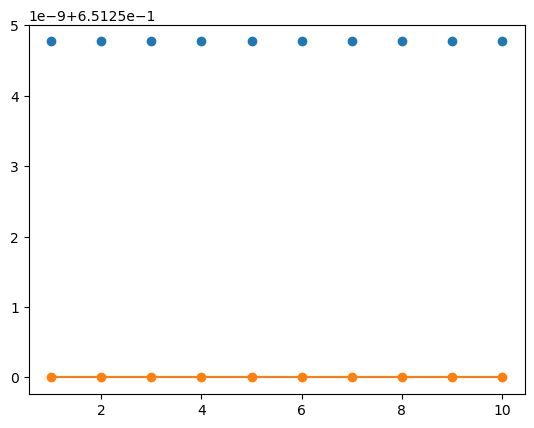

In [14]:

##############random split
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from numpy import mean
from numpy import std
import numpy
from numpy import array
from numpy import argmax
 
# evaluate a single mlp model
def evaluate_model(trainX, trainy, testX, testy):
	# encode targets
	trainy_enc = to_categorical(trainy)
	testy_enc = to_categorical(testy)
	# define model
	
    
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy_enc, epochs=1, verbose=0, batch_size=32)
	# evaluate the model
	_, test_acc = model.evaluate(testX, testy_enc, verbose=0, batch_size=32)
	return model, test_acc
 
# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
	# make predictions
	yhats = [model.predict(testX) for model in members]
	yhats = array(yhats)
	# sum across ensemble members
	summed = numpy.sum(yhats, axis=0)
	# argmax across classes
	result = argmax(summed, axis=1)
	return result
 
# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
	# select a subset of members
	subset = members[:n_members]
	# make prediction
	yhat = ensemble_predictions(subset, testX)
	# calculate accuracy
	return accuracy_score(testy, yhat)
 

X, y  = input_train, target_train
newX, newy = input_test, target_test  
# multiple train-test splits
n_splits = 10
scores, members = list(), list()
for _ in range(n_splits):
	# split data
	trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.10)
	# evaluate model
	model, test_acc = evaluate_model(trainX, trainy, testX, testy)
	print('>%.3f' % test_acc)
	scores.append(test_acc)
	members.append(model)
# summarize expected performance
print('Estimated Accuracy %.3f (%.3f)' % (mean(scores), std(scores)))
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, n_splits+1):
	ensemble_score = evaluate_n_members(members, i, newX, newy)
	newy_enc = to_categorical(newy)
	_, single_score = members[i-1].evaluate(newX, newy_enc, verbose=0)
	print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
	ensemble_scores.append(ensemble_score)
	single_scores.append(single_score)
# plot score vs number of ensemble members
print('Accuracy %.3f (%.3f)' % (mean(single_scores), std(single_scores)))
x_axis = [i for i in range(1, n_splits+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()

In [15]:

import numpy as np
pred=model.predict(input_test)
m=tf.keras.metrics.Precision()
# x=a+c+b+ghhh
pred=np.argmax(pred, axis=1)
# x.shape
m.update_state(pred, target_test)
print("precision", m.result().numpy())

n=tf.keras.metrics.Recall()
n.update_state(pred, target_test)
print("recall", n.result().numpy())


print("f1",2*(n.result().numpy()*m.result().numpy())/(n.result().numpy()+n.result().numpy()) )

25/25 [==============================] - 0s 2ms/step
precision 0.9452888
recall 0.9093567
f1 0.9452888000202406


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 64)     256       
 hNormalization)                                                 
                                                        

In [13]:
tf.random.set_seed(25)

model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:

history= model.fit(input_train, target_train,
            batch_size=16,
            epochs=75,
            verbose=verbosity,
            validation_split=validation_split,
#                    callbacks=[model_checkpoint_callback]
            )

Epoch 1/75


In [18]:
tf.random.set_seed(25)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/main_model",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history= model.fit(input_train, target_train,
            batch_size=16,
            epochs=75,
            verbose=verbosity,
            validation_split=validation_split,
                   callbacks=[model_checkpoint_callback]
            )

Train on 3165 samples, validate on 352 samples
Epoch 1/75
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/main_model\assets
3165/3165 - 4s - loss: 1.3870 - accuracy: 0.4919 - val_loss: 3.1568 - val_accuracy: 0.2386
Epoch 2/75
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/main_model\assets
3165/3165 - 3s - loss: 0.9916 - accuracy: 0.6155 - val_loss: 1.3764 - val_accuracy: 0.4432
Epoch 3/75
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/main_model\assets
3165/3165 - 3s - loss: 0.8466 - accuracy: 0.6891 - val_loss: 1.2503 - val_accuracy: 0.5199
Epoch 4/75
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/main_model\assets
3165/3165 - 3s - loss: 0.7308 - accuracy: 0.7368 - val_loss: 1.0271 - val_accuracy: 0.6364
Epoch 5/75
3165/3165 - 1s - loss: 0.5556 - accuracy: 0.7902 - va

Epoch 69/75
3165/3165 - 1s - loss: 0.0413 - accuracy: 0.9870 - val_loss: 2.4417 - val_accuracy: 0.6449
Epoch 70/75
3165/3165 - 1s - loss: 0.0474 - accuracy: 0.9861 - val_loss: 2.4161 - val_accuracy: 0.6506
Epoch 71/75
3165/3165 - 1s - loss: 0.0427 - accuracy: 0.9864 - val_loss: 2.9154 - val_accuracy: 0.6250
Epoch 72/75
3165/3165 - 1s - loss: 0.0287 - accuracy: 0.9908 - val_loss: 2.6002 - val_accuracy: 0.6903
Epoch 73/75
3165/3165 - 1s - loss: 0.0447 - accuracy: 0.9877 - val_loss: 2.7716 - val_accuracy: 0.6193
Epoch 74/75
3165/3165 - 1s - loss: 0.0158 - accuracy: 0.9924 - val_loss: 2.5273 - val_accuracy: 0.6307
Epoch 75/75
3165/3165 - 1s - loss: 0.0142 - accuracy: 0.9949 - val_loss: 2.3496 - val_accuracy: 0.6648


In [19]:
history.history['accuracy']

[0.49194312,
 0.61548185,
 0.68909955,
 0.73680884,
 0.79020536,
 0.86034757,
 0.8935229,
 0.9263823,
 0.9624013,
 0.93522906,
 0.94186413,
 0.9687204,
 0.9687204,
 0.9592417,
 0.9687204,
 0.9677725,
 0.978831,
 0.9797788,
 0.9769352,
 0.9725118,
 0.98388624,
 0.9829384,
 0.98041075,
 0.99620855,
 0.9832544,
 0.9747235,
 0.95955765,
 0.98483413,
 0.9886256,
 0.97946286,
 0.98672986,
 0.9883096,
 0.98988944,
 0.9977883,
 0.9977883,
 0.99842024,
 0.9987362,
 0.99842024,
 0.99842024,
 0.9661927,
 0.9399684,
 0.9756714,
 0.9823065,
 0.98672986,
 0.9914692,
 0.99241704,
 0.99115324,
 0.992733,
 0.992733,
 0.9946287,
 0.9845182,
 0.9791469,
 0.98799366,
 0.99399686,
 0.99241704,
 0.99210113,
 0.9908373,
 0.9908373,
 0.98988944,
 0.98609793,
 0.9886256,
 0.99020535,
 0.9864139,
 0.9914692,
 0.9886256,
 0.9892575,
 0.99304897,
 0.98988944,
 0.9870458,
 0.98609793,
 0.9864139,
 0.9908373,
 0.98767775,
 0.99241704,
 0.9949447]

In [20]:
history.history["val_accuracy"]

[0.23863636,
 0.4431818,
 0.5198864,
 0.6363636,
 0.6136364,
 0.66477275,
 0.6505682,
 0.57670456,
 0.6505682,
 0.61079544,
 0.70170456,
 0.69034094,
 0.65909094,
 0.63920456,
 0.6505682,
 0.69034094,
 0.67045456,
 0.67897725,
 0.64204544,
 0.6505682,
 0.6448864,
 0.6676136,
 0.6988636,
 0.67897725,
 0.65625,
 0.6505682,
 0.69602275,
 0.6761364,
 0.6619318,
 0.65909094,
 0.6761364,
 0.67897725,
 0.63352275,
 0.6818182,
 0.69034094,
 0.6931818,
 0.69602275,
 0.7073864,
 0.69602275,
 0.49147728,
 0.59375,
 0.6619318,
 0.68465906,
 0.68465906,
 0.65340906,
 0.6505682,
 0.67329544,
 0.6875,
 0.66477275,
 0.65340906,
 0.64204544,
 0.67329544,
 0.68465906,
 0.73295456,
 0.67897725,
 0.63352275,
 0.6505682,
 0.65340906,
 0.6931818,
 0.6448864,
 0.67329544,
 0.6676136,
 0.6988636,
 0.69034094,
 0.69034094,
 0.67897725,
 0.6875,
 0.62784094,
 0.6448864,
 0.6505682,
 0.625,
 0.69034094,
 0.6193182,
 0.6306818,
 0.66477275]

In [21]:
history.history['val_loss']

[3.156785639849576,
 1.3763858865607868,
 1.2503064437346025,
 1.0270703082734889,
 1.111207127571106,
 1.0299454683607274,
 1.093212440609932,
 1.5769122486764735,
 1.5326725989580154,
 1.593833091584119,
 1.415500220927325,
 1.4548708430745385,
 1.4822755354371937,
 1.489586201581088,
 1.4710976671088825,
 1.592993063005534,
 1.4515661624344913,
 1.4878499480811032,
 1.9045133929360996,
 1.9592698365449905,
 2.0370216830210253,
 1.7173781665888699,
 1.4565127302299847,
 1.69491585818204,
 1.8201730847358704,
 1.6518698768182234,
 1.4805481826717204,
 1.8827129710804333,
 1.8776529336517507,
 1.645110314542597,
 1.661801210858605,
 1.8858709281141108,
 1.99718700484796,
 1.7108262736688962,
 1.6981125175952911,
 1.753182946958325,
 1.6753400259397246,
 1.6344086703929035,
 1.7644455080682582,
 3.003860181028193,
 2.7575789310715417,
 1.923931442878463,
 2.1121650609103115,
 1.704562682658434,
 2.0240428230979224,
 2.1681977178562772,
 2.1810832253911276,
 2.0097502849318762,
 2.239390

In [22]:
history.history['loss']

[1.3869765830077643,
 0.9915974568793371,
 0.846575526942574,
 0.7307536935730945,
 0.555628916701246,
 0.3778044951188056,
 0.31548062647217634,
 0.20426864084474283,
 0.13294440608406896,
 0.1919762622523835,
 0.16051596781183006,
 0.09943298490167747,
 0.10172943301531258,
 0.10891245334081082,
 0.09727681752994632,
 0.0940627436814197,
 0.07980405998579558,
 0.062448584054939534,
 0.07384746122125413,
 0.08457074417625253,
 0.060152021176726106,
 0.05448580414025881,
 0.06860975796013988,
 0.019876418960660308,
 0.0455124896361035,
 0.08574118148336866,
 0.12535138627783488,
 0.049387953858410626,
 0.03786849118555833,
 0.0555426412809524,
 0.041849336261136606,
 0.04090071654121581,
 0.042797490589888576,
 0.007608448759774791,
 0.005200970465419255,
 0.0059658894277085615,
 0.004112015478442856,
 0.003174253599658155,
 0.003457107970178036,
 0.12279694426942851,
 0.197752553241042,
 0.08109412848891316,
 0.048024359703799424,
 0.04148770554504447,
 0.024315141907699418,
 0.021701

In [16]:
model=load_model("D:/Users/dsh/Desktop/Papers/paper3/fish - Copy/main_model/")

In [22]:
a=model.predict(input_test)
print(len(a))

25/25 [==============================] - 0s 4ms/step
800


In [22]:
accuracy_from_test(a, target_test)

0.93125


In [23]:

import numpy as np
pred=model.predict(input_test)
m=tf.keras.metrics.Precision()
# x=a+c+b+ghhh
pred=np.argmax(pred, axis=1)
# x.shape
m.update_state(pred, target_test)
print("precision", m.result().numpy())

n=tf.keras.metrics.Recall()
n.update_state(pred, target_test)
print("recall", n.result().numpy())


print("f1",2*(n.result().numpy()*m.result().numpy())/(n.result().numpy()+n.result().numpy()) )

25/25 [==============================] - 0s 12ms/step
precision 0.47049925
recall 0.7913486
f1 0.470499244311017


In [26]:
##########################################################################################

In [27]:
tf.random.set_seed(25)

model1 = Sequential()
model1.add(Reshape((img_width, img_height,1), input_shape=(img_width, img_height)))
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(no_classes, activation='softmax'))

In [28]:
tf.random.set_seed(25)
model1.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [29]:
tf.random.set_seed(25)

model_checkpoint_callback1 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_1",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history1_1 = model1.fit(input_train[:,:,:,0], target_train,
            batch_size=16,
            epochs=25,
            verbose=verbosity,
            validation_split=validation_split,
                       callbacks=[model_checkpoint_callback1])



model1.save('model1_1.h5')




Train on 3165 samples, validate on 352 samples
Epoch 1/25
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_1\assets
3165/3165 - 3s - loss: 2.2542 - accuracy: 0.2882 - val_loss: 1.6819 - val_accuracy: 0.2841
Epoch 2/25
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_1\assets
3165/3165 - 3s - loss: 1.5292 - accuracy: 0.3292 - val_loss: 1.5793 - val_accuracy: 0.3210
Epoch 3/25
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_1\assets
3165/3165 - 3s - loss: 1.4781 - accuracy: 0.3618 - val_loss: 1.5311 - val_accuracy: 0.3636
Epoch 4/25
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_1\assets
3165/3165 - 3s - loss: 1.4545 - accuracy: 0.3700 - val_loss: 1.4462 - val_accuracy: 0.4034
Epoch 5/25
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_1\assets
3165/3165 - 3s - loss: 1.4007 - accuracy: 0.

In [30]:
history1_1.history["loss"]

[2.2541570831060787,
 1.5291500288539965,
 1.4780872892617802,
 1.45447208926576,
 1.4006883613682848,
 1.3553487689197534,
 1.3016428830687656,
 1.239377709399279,
 1.1445240089302002,
 1.0540257281413388,
 0.9469043391575745,
 0.8292205493032084,
 0.7405559204389323,
 0.5730452330850688,
 0.4708509779842732,
 0.34618967605804757,
 0.33402819724821176,
 0.2251259283902709,
 0.19715206973831423,
 0.15762219978923103,
 0.11247018262814572,
 0.08964253009295482,
 0.0960142975805495,
 0.09672938590695696,
 0.11210028132038283]

In [31]:
history1_1.history["accuracy"]

[0.28815165,
 0.3292259,
 0.36176935,
 0.3699842,
 0.40947866,
 0.43191153,
 0.45560822,
 0.4843602,
 0.52733016,
 0.5709321,
 0.61769354,
 0.6729858,
 0.71342814,
 0.77977884,
 0.81737757,
 0.8720379,
 0.87835705,
 0.9219589,
 0.9251185,
 0.94691944,
 0.96398103,
 0.9649289,
 0.9677725,
 0.9655608,
 0.96176934]

In [32]:
history1_1.history["val_accuracy"]

[0.2840909,
 0.32102272,
 0.36363637,
 0.4034091,
 0.4090909,
 0.3778409,
 0.41477272,
 0.4318182,
 0.42613637,
 0.46022728,
 0.48579547,
 0.3778409,
 0.4943182,
 0.46022728,
 0.48863637,
 0.49147728,
 0.52840906,
 0.5113636,
 0.5,
 0.4431818,
 0.4090909,
 0.5056818,
 0.5056818,
 0.41477272,
 0.4403409]

In [33]:
history1_1.history["val_loss"]

[1.6818851232528687,
 1.5793334679170088,
 1.531105014410886,
 1.4462168270891362,
 1.485829765146429,
 1.4833523956212131,
 1.4071207154880871,
 1.432276563210921,
 1.4402317892421375,
 1.5085968971252441,
 1.4652475741776554,
 1.676587234843861,
 1.5545853674411774,
 2.165426882830533,
 1.6990168067541989,
 1.9529371938922189,
 1.8576238507574254,
 2.232106303626841,
 2.144687294960022,
 2.465528141368519,
 4.275287324732,
 2.5761550095948307,
 2.839659414508126,
 2.981373656879772,
 3.4776936661113393]

In [34]:
model1_1_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_1")

In [35]:
pred1_1=model1_1_max.predict(input_test[:,:,:,0])


In [36]:
accuracy_from_test(pred1_1, target_test)

0.47


In [37]:

model1_2=load_model('model1_1.h5')

model_checkpoint_callback1_2 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_2",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
 

history1_2=model1_2.fit(input_train[:,:,:,0], target_train,
            batch_size=16,
            epochs=5,
            verbose=2,
            validation_split=validation_split,
                        callbacks=[model_checkpoint_callback1_2]
                  )

model1_2.save('model1_2.h5')



Train on 3165 samples, validate on 352 samples
Epoch 1/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_2\assets
3165/3165 - 3s - loss: 0.0882 - accuracy: 0.9690 - val_loss: 2.9674 - val_accuracy: 0.4830
Epoch 2/5
3165/3165 - 1s - loss: 0.0933 - accuracy: 0.9681 - val_loss: 3.2174 - val_accuracy: 0.4801
Epoch 3/5
3165/3165 - 1s - loss: 0.0507 - accuracy: 0.9839 - val_loss: 3.2507 - val_accuracy: 0.4659
Epoch 4/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_2\assets
3165/3165 - 3s - loss: 0.0667 - accuracy: 0.9785 - val_loss: 3.4568 - val_accuracy: 0.4886
Epoch 5/5
3165/3165 - 1s - loss: 0.0347 - accuracy: 0.9880 - val_loss: 3.9601 - val_accuracy: 0.4716


In [38]:
model1_2_max=load_model('C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_2')
pred1_2=model1_2_max.predict(input_test[:,:,:,0])

In [39]:
accuracy_from_test(pred1_2, target_test)

0.45375


In [40]:
model1_3=load_model('model1_2.h5')

model_checkpoint_callback1_3 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_3",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)



history1_3 = model1_3.fit(input_train[:,:,:,0], target_train,
            batch_size=16,
            epochs=10,
            verbose=2,
            validation_split=validation_split,
                          
callbacks=[model_checkpoint_callback1_3])

model1_3.save('model1_3.h5')

model1_3_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_3")
pred1_3=model1_3_max.predict(input_test[:,:,:,0])

Train on 3165 samples, validate on 352 samples
Epoch 1/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_3\assets
3165/3165 - 3s - loss: 0.0730 - accuracy: 0.9754 - val_loss: 4.0326 - val_accuracy: 0.4460
Epoch 2/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_3\assets
3165/3165 - 3s - loss: 0.1024 - accuracy: 0.9665 - val_loss: 3.6690 - val_accuracy: 0.4943
Epoch 3/10
3165/3165 - 1s - loss: 0.0743 - accuracy: 0.9722 - val_loss: 4.1377 - val_accuracy: 0.4261
Epoch 4/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_3\assets
3165/3165 - 3s - loss: 0.0370 - accuracy: 0.9896 - val_loss: 3.4784 - val_accuracy: 0.4972
Epoch 5/10
3165/3165 - 1s - loss: 0.0190 - accuracy: 0.9940 - val_loss: 4.0998 - val_accuracy: 0.4688
Epoch 6/10
3165/3165 - 1s - loss: 0.0126 - accuracy: 0.9965 - val_loss: 3.9138 - val_accuracy: 0.4943
Epoch 7/10
3165/3165 - 1s - loss: 0.0218 - accu

In [41]:
accuracy_from_test(pred1_3, target_test)

0.4775


In [42]:
model1_4=load_model('model1_3.h5')

model_checkpoint_callback1_4 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_4",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
 

history1_4 = model1_4.fit(input_train[:,:,:,0], target_train,
            batch_size=16,
            epochs=15,
            verbose=2,
            validation_split=validation_split,
                         callbacks=[model_checkpoint_callback1_4])
model1_4.save('model1_4.h5')


Train on 3165 samples, validate on 352 samples
Epoch 1/15
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_4\assets
3165/3165 - 3s - loss: 0.0355 - accuracy: 0.9893 - val_loss: 3.3811 - val_accuracy: 0.4915
Epoch 2/15
3165/3165 - 1s - loss: 0.0259 - accuracy: 0.9899 - val_loss: 3.8077 - val_accuracy: 0.4716
Epoch 3/15
3165/3165 - 1s - loss: 0.0195 - accuracy: 0.9930 - val_loss: 3.7285 - val_accuracy: 0.4915
Epoch 4/15
3165/3165 - 1s - loss: 0.0154 - accuracy: 0.9940 - val_loss: 4.2899 - val_accuracy: 0.4602
Epoch 5/15
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_4\assets
3165/3165 - 2s - loss: 0.0267 - accuracy: 0.9918 - val_loss: 3.7712 - val_accuracy: 0.5000
Epoch 6/15
3165/3165 - 1s - loss: 0.0278 - accuracy: 0.9880 - val_loss: 6.1388 - val_accuracy: 0.4176
Epoch 7/15
3165/3165 - 1s - loss: 0.0724 - accuracy: 0.9795 - val_loss: 3.9251 - val_accuracy: 0.4631
Epoch 8/15
3165/3165 - 1s - loss: 0.0459 - 

In [43]:
model1_4_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_4")
pred1_4=model1_4_max.predict(input_test[:,:,:,0])

In [44]:
accuracy_from_test(pred1_4, target_test)

0.47875


In [45]:
model1_5=load_model('model1_4.h5')

model_checkpoint_callback1_5 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_5",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)



history1_5 = model1_5.fit(input_train[:,:,:,0], target_train,
            batch_size=16,
            epochs=20,
            verbose=2,
            validation_split=validation_split,
                         callbacks=[model_checkpoint_callback1_5])
model1_5.save('model1_5.h5')



Train on 3165 samples, validate on 352 samples
Epoch 1/20
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_5\assets
3165/3165 - 3s - loss: 0.0327 - accuracy: 0.9896 - val_loss: 4.3829 - val_accuracy: 0.4545
Epoch 2/20
3165/3165 - 1s - loss: 0.0464 - accuracy: 0.9893 - val_loss: 6.1549 - val_accuracy: 0.4205
Epoch 3/20
3165/3165 - 1s - loss: 0.0468 - accuracy: 0.9839 - val_loss: 4.2961 - val_accuracy: 0.4261
Epoch 4/20
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_5\assets
3165/3165 - 3s - loss: 0.0397 - accuracy: 0.9864 - val_loss: 3.9061 - val_accuracy: 0.4943
Epoch 5/20
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_5\assets
3165/3165 - 2s - loss: 0.0202 - accuracy: 0.9927 - val_loss: 3.8066 - val_accuracy: 0.5028
Epoch 6/20
3165/3165 - 1s - loss: 0.0187 - accuracy: 0.9918 - val_loss: 4.2561 - val_accuracy: 0.4688
Epoch 7/20
3165/3165 - 1s - loss: 0.0315 - accu

In [46]:
model1_5_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_5")
pred1_5=model1_5_max.predict(input_test[:,:,:,0])

In [47]:
accuracy_from_test(pred1_5, target_test)

0.47375


In [27]:
model1_1_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/fish - Copy/model1_1")
pred1_1=model1_1_max.predict(input_test[:,:,:,0])

model1_2_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/fish - Copy/model1_2")
pred1_2=model1_2_max.predict(input_test[:,:,:,0])

model1_3_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/fish - Copy/model1_3")
pred1_3=model1_3_max.predict(input_test[:,:,:,0])

model1_4_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/fish - Copy/model1_4")
pred1_4=model1_4_max.predict(input_test[:,:,:,0])

model1_5_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/fish - Copy/model1_5")
pred1_5=model1_5_max.predict(input_test[:,:,:,0])

25/25 [==============================] - 0s 7ms/step


In [24]:
accuracy_from_test(pred1_1, target_test)

0.81875


In [25]:
accuracy_from_test(pred1_2, target_test)

0.82


In [26]:
accuracy_from_test(pred1_3, target_test)

0.87125


In [27]:
accuracy_from_test(pred1_4, target_test)

0.88875


In [28]:
accuracy_from_test(pred1_5, target_test)

0.88625


In [28]:
ghhh=pred1_4+pred1_5+pred1_3+pred1_2+pred1_1

In [30]:
accuracy_from_test(ghhh, target_test)

0.89875


In [31]:
accuracy_from_test(a, target_test)

0.93125


In [57]:
#define space 
print(define_space(pred1_1, pred1_2, target_test))
print(define_space(pred1_1, pred1_3, target_test))
print(define_space(pred1_1, pred1_4, target_test))
print(define_space(pred1_1, pred1_5, target_test))

800 800
pred1 unique adnvantage 0.145
None
800 800
pred1 unique adnvantage 0.10375
None
800 800
pred1 unique adnvantage 0.0975
None
800 800
pred1 unique adnvantage 0.1175
None


In [58]:
print(define_space(pred1_2, pred1_1, target_test))
print(define_space(pred1_2, pred1_3, target_test))
print(define_space(pred1_2, pred1_4, target_test))
print(define_space(pred1_2, pred1_5, target_test))

800 800
pred1 unique adnvantage 0.12875
None
800 800
pred1 unique adnvantage 0.13375
None
800 800
pred1 unique adnvantage 0.1025
None
800 800
pred1 unique adnvantage 0.11
None


In [59]:
print(define_space(pred1_3, pred1_2, target_test))
print(define_space(pred1_3, pred1_1, target_test))
print(define_space(pred1_3, pred1_4, target_test))
print(define_space(pred1_3, pred1_5, target_test))

800 800
pred1 unique adnvantage 0.1575
None
800 800
pred1 unique adnvantage 0.11125
None
800 800
pred1 unique adnvantage 0.10125
None
800 800
pred1 unique adnvantage 0.10875
None


In [60]:
print(define_space(pred1_4, pred1_2, target_test))
print(define_space(pred1_4, pred1_3, target_test))
print(define_space(pred1_4, pred1_1, target_test))
print(define_space(pred1_4, pred1_5, target_test))

800 800
pred1 unique adnvantage 0.1275
None
800 800
pred1 unique adnvantage 0.1025
None
800 800
pred1 unique adnvantage 0.10625
None
800 800
pred1 unique adnvantage 0.1
None


In [61]:
print(define_space(pred1_5, pred1_2, target_test))
print(define_space(pred1_5, pred1_3, target_test))
print(define_space(pred1_5, pred1_4, target_test))
print(define_space(pred1_5, pred1_1, target_test))

800 800
pred1 unique adnvantage 0.13
None
800 800
pred1 unique adnvantage 0.105
None
800 800
pred1 unique adnvantage 0.095
None
800 800
pred1 unique adnvantage 0.12125
None


In [62]:
history1_1.history['loss']


[2.2541570831060787,
 1.5291500288539965,
 1.4780872892617802,
 1.45447208926576,
 1.4006883613682848,
 1.3553487689197534,
 1.3016428830687656,
 1.239377709399279,
 1.1445240089302002,
 1.0540257281413388,
 0.9469043391575745,
 0.8292205493032084,
 0.7405559204389323,
 0.5730452330850688,
 0.4708509779842732,
 0.34618967605804757,
 0.33402819724821176,
 0.2251259283902709,
 0.19715206973831423,
 0.15762219978923103,
 0.11247018262814572,
 0.08964253009295482,
 0.0960142975805495,
 0.09672938590695696,
 0.11210028132038283]

In [63]:
history1_1.history['val_loss']

[1.6818851232528687,
 1.5793334679170088,
 1.531105014410886,
 1.4462168270891362,
 1.485829765146429,
 1.4833523956212131,
 1.4071207154880871,
 1.432276563210921,
 1.4402317892421375,
 1.5085968971252441,
 1.4652475741776554,
 1.676587234843861,
 1.5545853674411774,
 2.165426882830533,
 1.6990168067541989,
 1.9529371938922189,
 1.8576238507574254,
 2.232106303626841,
 2.144687294960022,
 2.465528141368519,
 4.275287324732,
 2.5761550095948307,
 2.839659414508126,
 2.981373656879772,
 3.4776936661113393]

In [64]:
history1_2.history['loss']


[0.08815482732432336,
 0.09325006997498196,
 0.05073272559113542,
 0.06665664742381487,
 0.03469191291144207]

In [65]:
history1_2.history['val_loss']

[2.9674417755820532,
 3.217353631149639,
 3.2507457082921807,
 3.456849683414806,
 3.9600665406747297]

In [66]:
history1_3.history['loss']

[0.07295766086781053,
 0.10239187540871932,
 0.07429984278011754,
 0.036953782212370966,
 0.01900614922168101,
 0.012558560210444169,
 0.02175957697729093,
 0.13837475508229297,
 0.08842448291367311,
 0.04628964839900416]

In [67]:
history1_3.history['val_loss']

[4.032648281617598,
 3.668966672637246,
 4.137655940922824,
 3.478385778990659,
 4.099830543453043,
 3.913751705126329,
 4.983897198330272,
 4.6319416544654155,
 3.892694641243328,
 3.8065701560540632]

In [68]:
history1_4.history['loss']

[0.035484920924161244,
 0.025850387924068678,
 0.019475441953696247,
 0.015372960497674828,
 0.02671442167376614,
 0.0277504110558348,
 0.07239952236259471,
 0.045884259917521715,
 0.035206214950778955,
 0.03333075417374291,
 0.025636239583192263,
 0.034940323981353334,
 0.03233506300029239,
 0.033104580626640935,
 0.029580355351548942]

In [69]:
history1_4.history['val_loss']

[3.3810578801415185,
 3.8076652992855418,
 3.728485172445124,
 4.2898518226363445,
 3.7711893265897576,
 6.1388432437723335,
 3.925105409188704,
 3.449933658946644,
 3.998869841749018,
 5.262376416813243,
 4.607038422064348,
 4.7833992567929355,
 3.487748146057129,
 3.9209505915641785,
 3.4849070093848487]

In [70]:
history1_5.history['loss']

[0.03271772273689316,
 0.04637233930302263,
 0.04675838495988147,
 0.03972568353219197,
 0.020175502367596267,
 0.018710591131736218,
 0.0315228825262247,
 0.01663015949107122,
 0.010865545873631016,
 0.007959385624955274,
 0.017627704925649385,
 0.025572337435152595,
 0.02231942610836662,
 0.019653852243520755,
 0.039867814178539934,
 0.04671149320159649,
 0.04422306739958049,
 0.04873653570326384,
 0.055431592138473776,
 0.013596237919721832]

In [71]:
history1_5.history['val_loss']

[4.382892847061157,
 6.154872395775535,
 4.2961429520086805,
 3.9061471819877625,
 3.8066168346188287,
 4.256073240529407,
 3.9110404415564104,
 3.9762831872159783,
 4.344266094944694,
 4.013409774411809,
 5.332331700758501,
 5.729504823684692,
 5.029911290515553,
 5.025934381918474,
 5.609890753572637,
 7.651886918328025,
 4.956625304438851,
 4.600741093808955,
 6.541910258206454,
 4.469431270252574]

In [72]:
history1_1.history['accuracy']

[0.28815165,
 0.3292259,
 0.36176935,
 0.3699842,
 0.40947866,
 0.43191153,
 0.45560822,
 0.4843602,
 0.52733016,
 0.5709321,
 0.61769354,
 0.6729858,
 0.71342814,
 0.77977884,
 0.81737757,
 0.8720379,
 0.87835705,
 0.9219589,
 0.9251185,
 0.94691944,
 0.96398103,
 0.9649289,
 0.9677725,
 0.9655608,
 0.96176934]

In [73]:
history1_1.history['val_accuracy']

[0.2840909,
 0.32102272,
 0.36363637,
 0.4034091,
 0.4090909,
 0.3778409,
 0.41477272,
 0.4318182,
 0.42613637,
 0.46022728,
 0.48579547,
 0.3778409,
 0.4943182,
 0.46022728,
 0.48863637,
 0.49147728,
 0.52840906,
 0.5113636,
 0.5,
 0.4431818,
 0.4090909,
 0.5056818,
 0.5056818,
 0.41477272,
 0.4403409]

In [74]:
history1_2.history['accuracy']

[0.96903634, 0.96808845, 0.98388624, 0.978515, 0.98799366]

In [75]:
history1_2.history['val_accuracy']

[0.48295453, 0.48011363, 0.4659091, 0.48863637, 0.4715909]

In [76]:
history1_3.history['accuracy']

[0.97535545,
 0.9665087,
 0.97219586,
 0.9895735,
 0.99399686,
 0.9965245,
 0.99210113,
 0.964297,
 0.97030014,
 0.98483413]

In [77]:
history1_3.history['val_accuracy']

[0.44602272,
 0.4943182,
 0.42613637,
 0.4971591,
 0.46875,
 0.4943182,
 0.4318182,
 0.4005682,
 0.4659091,
 0.5056818]

In [78]:
history1_4.history['accuracy']

[0.9892575,
 0.98988944,
 0.99304897,
 0.99399686,
 0.99178517,
 0.98799366,
 0.97946286,
 0.9842022,
 0.98894155,
 0.99020535,
 0.98988944,
 0.98988944,
 0.99020535,
 0.98799366,
 0.9892575]

In [79]:
history1_4.history['val_accuracy']

[0.49147728,
 0.4715909,
 0.49147728,
 0.46022728,
 0.5,
 0.41761363,
 0.4630682,
 0.4744318,
 0.4119318,
 0.41477272,
 0.4431818,
 0.44886363,
 0.48579547,
 0.45170453,
 0.4659091]

In [80]:
history1_5.history['accuracy']

[0.9895735,
 0.9892575,
 0.98388624,
 0.9864139,
 0.992733,
 0.99178517,
 0.99115324,
 0.9936809,
 0.9968404,
 0.9965245,
 0.9949447,
 0.99178517,
 0.99210113,
 0.99241704,
 0.98799366,
 0.98578197,
 0.98767775,
 0.98767775,
 0.9832544,
 0.99399686]

In [81]:
history1_5.history['val_accuracy']

[0.45454547,
 0.42045453,
 0.42613637,
 0.4943182,
 0.50284094,
 0.46875,
 0.48863637,
 0.48295453,
 0.4318182,
 0.5,
 0.38920453,
 0.3693182,
 0.44886363,
 0.45738637,
 0.41761363,
 0.3693182,
 0.44886363,
 0.45738637,
 0.42045453,
 0.4943182]

#############################channel2#####################################################################

In [82]:
tf.random.set_seed(25)

model2 = Sequential()
model2.add(Reshape((img_width, img_height,1), input_shape=(img_width, img_height)))
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(no_classes, activation='softmax'))

In [83]:
model2.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [84]:


model_checkpoint_callback2_1 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_1",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


history2_1 = model2.fit(input_train[:,:,:,1], target_train,
            batch_size=16,
            epochs=5,
            verbose=verbosity,
            validation_split=validation_split,
                       callbacks=[model_checkpoint_callback2_1])
save_model(model2,'model2_1.h5')

model2_1_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_1")
pred2_1=model2_1_max.predict(input_test[:,:,:,1])



Train on 3165 samples, validate on 352 samples
Epoch 1/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_1\assets
3165/3165 - 3s - loss: 2.3800 - accuracy: 0.2626 - val_loss: 1.5815 - val_accuracy: 0.2557
Epoch 2/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_1\assets
3165/3165 - 3s - loss: 1.5200 - accuracy: 0.3264 - val_loss: 1.5876 - val_accuracy: 0.2841
Epoch 3/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_1\assets
3165/3165 - 2s - loss: 1.4653 - accuracy: 0.3488 - val_loss: 1.4741 - val_accuracy: 0.3438
Epoch 4/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_1\assets
3165/3165 - 3s - loss: 1.4392 - accuracy: 0.3649 - val_loss: 1.5064 - val_accuracy: 0.3807
Epoch 5/5
3165/3165 - 1s - loss: 1.3815 - accuracy: 0.4114 - val_loss: 1.7223 - val_accuracy: 0.3040


In [85]:
accuracy_from_test(pred2_1, target_test)

0.33375


In [86]:
model2_2=load_model('model2_1.h5')
model_checkpoint_callback2_2 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_2",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


history2_2=model2_2.fit(input_train[:,:,:,1], target_train,
            batch_size=16,
            epochs=5,
            verbose=2,
            validation_split=validation_split,
                        callbacks=[model_checkpoint_callback2_2]
                  )

model2_2.save('model2_2.h5')

model2_2_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_2")
pred2_2=model2_2_max.predict(input_test[:,:,:,1])


Train on 3165 samples, validate on 352 samples
Epoch 1/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_2\assets
3165/3165 - 3s - loss: 1.3650 - accuracy: 0.4142 - val_loss: 1.5957 - val_accuracy: 0.3523
Epoch 2/5
3165/3165 - 1s - loss: 1.2870 - accuracy: 0.4493 - val_loss: 2.1628 - val_accuracy: 0.3295
Epoch 3/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_2\assets
3165/3165 - 3s - loss: 1.2278 - accuracy: 0.4866 - val_loss: 1.8510 - val_accuracy: 0.3551
Epoch 4/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_2\assets
3165/3165 - 2s - loss: 1.1493 - accuracy: 0.5239 - val_loss: 1.3589 - val_accuracy: 0.4375
Epoch 5/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_2\assets
3165/3165 - 3s - loss: 1.0317 - accuracy: 0.5747 - val_loss: 1.5152 - val_accuracy: 0.4716


In [87]:
accuracy_from_test(pred2_2, target_test)

0.46


In [88]:
model2_3=load_model('model2_2.h5')

model_checkpoint_callback2_3 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_3",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history2_3 = model2_3.fit(input_train[:,:,:,1], target_train,
            batch_size=16,
            epochs=10,
            verbose=2,
            validation_split=validation_split,
                         callbacks=[model_checkpoint_callback2_3])
model2_3.save('model2_3.h5')

model2_3_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_3")
pred2_3=model2_3_max.predict(input_test[:,:,:,1])

Train on 3165 samples, validate on 352 samples
Epoch 1/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_3\assets
3165/3165 - 3s - loss: 0.9127 - accuracy: 0.6325 - val_loss: 1.8221 - val_accuracy: 0.4403
Epoch 2/10
3165/3165 - 1s - loss: 0.7679 - accuracy: 0.7065 - val_loss: 2.2153 - val_accuracy: 0.3807
Epoch 3/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_3\assets
3165/3165 - 3s - loss: 0.6406 - accuracy: 0.7476 - val_loss: 1.7093 - val_accuracy: 0.4915
Epoch 4/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_3\assets
3165/3165 - 2s - loss: 0.5145 - accuracy: 0.8076 - val_loss: 1.7060 - val_accuracy: 0.5369
Epoch 5/10
3165/3165 - 1s - loss: 0.3349 - accuracy: 0.8717 - val_loss: 2.0241 - val_accuracy: 0.5199
Epoch 6/10
3165/3165 - 1s - loss: 0.2669 - accuracy: 0.9077 - val_loss: 2.8702 - val_accuracy: 0.4233
Epoch 7/10
3165/3165 - 1s - loss: 0.2033 - accu

In [89]:
accuracy_from_test(pred2_3, target_test)

0.495


In [90]:
model2_4=load_model('model2_3.h5')

model_checkpoint_callback2_4 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_4",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history2_4 = model2_4.fit(input_train[:,:,:,1], target_train,
            batch_size=16,
            epochs=15,
            verbose=2,
            validation_split=validation_split, 
                         callbacks=[model_checkpoint_callback2_4])
model2_4.save('model2_4.h5')


model2_4_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_4")
pred2_4=model2_4_max.predict(input_test[:,:,:,1])

Train on 3165 samples, validate on 352 samples
Epoch 1/15
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_4\assets
3165/3165 - 3s - loss: 0.0668 - accuracy: 0.9807 - val_loss: 2.7261 - val_accuracy: 0.5284
Epoch 2/15
3165/3165 - 1s - loss: 0.0717 - accuracy: 0.9763 - val_loss: 3.9747 - val_accuracy: 0.4801
Epoch 3/15
3165/3165 - 1s - loss: 0.1058 - accuracy: 0.9627 - val_loss: 3.1187 - val_accuracy: 0.4886
Epoch 4/15
3165/3165 - 1s - loss: 0.0673 - accuracy: 0.9776 - val_loss: 3.2420 - val_accuracy: 0.4886
Epoch 5/15
3165/3165 - 1s - loss: 0.0663 - accuracy: 0.9785 - val_loss: 3.1278 - val_accuracy: 0.4773
Epoch 6/15
3165/3165 - 1s - loss: 0.0581 - accuracy: 0.9807 - val_loss: 3.1506 - val_accuracy: 0.5114
Epoch 7/15
3165/3165 - 1s - loss: 0.0400 - accuracy: 0.9880 - val_loss: 3.0918 - val_accuracy: 0.4716
Epoch 8/15
3165/3165 - 1s - loss: 0.0415 - accuracy: 0.9839 - val_loss: 3.6981 - val_accuracy: 0.5085
Epoch 9/15
3165/3165 - 1s - loss: 0.073

In [91]:
accuracy_from_test(pred2_4, target_test)

0.53125


In [92]:
model2_5=load_model('model2_4.h5')

model_checkpoint_callback2_5 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_5",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history2_5 = model2_5.fit(input_train[:,:,:,1], target_train,
            batch_size=16,
            epochs=20,
            verbose=2,
            validation_split=validation_split,
                         callbacks=[model_checkpoint_callback2_5])
model2_5.save('model2_5.h5')

model2_5_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_5")
pred2_5=model2_5_max.predict(input_test[:,:,:,1])

Train on 3165 samples, validate on 352 samples
Epoch 1/20
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_5\assets
3165/3165 - 3s - loss: 0.0348 - accuracy: 0.9908 - val_loss: 4.1314 - val_accuracy: 0.5028
Epoch 2/20
3165/3165 - 1s - loss: 0.0392 - accuracy: 0.9889 - val_loss: 4.3479 - val_accuracy: 0.5000
Epoch 3/20
3165/3165 - 1s - loss: 0.0927 - accuracy: 0.9741 - val_loss: 4.0127 - val_accuracy: 0.4801
Epoch 4/20
3165/3165 - 1s - loss: 0.0582 - accuracy: 0.9845 - val_loss: 3.9544 - val_accuracy: 0.5028
Epoch 5/20
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_5\assets
3165/3165 - 2s - loss: 0.0265 - accuracy: 0.9896 - val_loss: 3.9595 - val_accuracy: 0.5341
Epoch 6/20
3165/3165 - 1s - loss: 0.0211 - accuracy: 0.9912 - val_loss: 4.0016 - val_accuracy: 0.4602
Epoch 7/20
3165/3165 - 1s - loss: 0.0191 - accuracy: 0.9934 - val_loss: 4.2286 - val_accuracy: 0.4432
Epoch 8/20
3165/3165 - 1s - loss: 0.0218 - 

In [93]:
accuracy_from_test(pred2_5, target_test)

0.50125


In [29]:
model2_1_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/fish - Copy/model2_1")
pred2_1=model2_1_max.predict(input_test[:,:,:,1])

model2_2_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/fish - Copy/model2_2")
pred2_2=model2_2_max.predict(input_test[:,:,:,1])

model2_3_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/fish - Copy/model2_3")
pred2_3=model2_3_max.predict(input_test[:,:,:,1])

model2_4_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/fish - Copy/model2_4")
pred2_4=model2_4_max.predict(input_test[:,:,:,1])

model2_5_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/fish - Copy/model2_5")
pred2_5=model2_5_max.predict(input_test[:,:,:,1])

25/25 [==============================] - 0s 7ms/step


In [33]:
accuracy_from_test(pred2_1, target_test)

0.38625


In [34]:
accuracy_from_test(pred2_1, target_test)

0.38625


In [35]:
accuracy_from_test(pred2_3, target_test)

0.85375


In [36]:
accuracy_from_test(pred2_4, target_test)

0.89


In [37]:
accuracy_from_test(pred2_5, target_test)

0.88125


In [30]:
b=pred2_3+pred2_4+pred2_5+pred2_1

In [39]:
accuracy_from_test(b, target_test)

0.8875


In [102]:
history2_1.history['loss']

[2.3799523982579864,
 1.5199869834981259,
 1.465302651979347,
 1.4392258481391798,
 1.3814660602271274]

In [103]:
history2_1.history['val_loss']

[1.5815276991237293,
 1.5875880176370794,
 1.4741495305841619,
 1.5063545107841492,
 1.7222995270382275]

In [104]:
history2_2.history['loss']

[1.3649612540882345,
 1.287020851989493,
 1.2277858138649385,
 1.1492979583770366,
 1.031659562873991]

In [105]:
history2_2.history['val_loss']

[1.5956740433519536,
 2.1628237800164656,
 1.8509937037121167,
 1.3588787804950366,
 1.515195217999545]

In [106]:
history2_3.history['loss']

[0.9127338836543368,
 0.7678969854238851,
 0.6405708989731697,
 0.5144904402948293,
 0.33492841815449426,
 0.2668659485158574,
 0.20325461518708,
 0.13028013421366752,
 0.11210507271225795,
 0.10603444522473296]

In [107]:
history2_3.history['val_loss']

[1.822105968540365,
 2.2153077721595764,
 1.7093441459265621,
 1.7059854160655628,
 2.0241166678341953,
 2.87019664591009,
 2.1608765585856005,
 2.7318989878351037,
 2.3338306817141445,
 2.56400666995482]

In [108]:
history2_4.history['loss']

[0.06684002488480784,
 0.07174098470599918,
 0.10581423372359826,
 0.0672634196407375,
 0.0662827815848004,
 0.05811004394232803,
 0.04003850604108819,
 0.041546269667763,
 0.07310499924295369,
 0.06906830921524909,
 0.033650467225525525,
 0.021557642081914262,
 0.017092902053351327,
 0.03468062666558924,
 0.05291895674010827]

In [109]:
history2_4.history['val_loss']

[2.726091742515564,
 3.97474097663706,
 3.1186787404797296,
 3.2419881983236833,
 3.1278368641029703,
 3.1505607908422295,
 3.091788110407916,
 3.6981320435350593,
 4.059095577760176,
 3.6244635338133033,
 3.1129473664543847,
 3.4149616902524773,
 3.369837378913706,
 3.689625382423401,
 3.4678536626425656]

In [110]:
history2_5.history['loss']

[0.034782103266280825,
 0.03917073073832239,
 0.09266039120032647,
 0.05819837906718619,
 0.02646598335702611,
 0.021096527149190348,
 0.01909512015060326,
 0.021800153625751648,
 0.023599459893354487,
 0.03468477499404059,
 0.026529115713237326,
 0.04275968072990371,
 0.07789887076763857,
 0.06357514763682309,
 0.0834718498935006,
 0.06883932520174914,
 0.029338872030533345,
 0.012655288520157647,
 0.010969458156342147,
 0.012968837124056495]

In [111]:
history2_5.history['val_loss']

[4.131449176506563,
 4.347876911813563,
 4.012670343572443,
 3.9544362019408834,
 3.9594524556940254,
 4.001568200913343,
 4.2285767793655396,
 3.7283087982372805,
 3.4504069821401075,
 4.2515974044799805,
 4.129700530659068,
 4.7331990437074145,
 4.698456601663069,
 5.909748196601868,
 4.724662436680361,
 3.880545984614979,
 3.3802330182357267,
 5.839101661335338,
 4.373412763530558,
 4.023365497589111]

In [112]:
history2_1.history['accuracy']

[0.26255924, 0.3263823, 0.34881517, 0.3649289, 0.41137442]

In [113]:
history2_1.history['val_accuracy']

[0.2556818, 0.2840909, 0.34375, 0.3806818, 0.30397728]

In [114]:
history2_2.history['accuracy']

[0.414218, 0.4492891, 0.48657188, 0.5238547, 0.57472354]

In [115]:
history2_2.history['val_accuracy']

[0.35227272, 0.32954547, 0.35511363, 0.4375, 0.4715909]

In [116]:
history2_3.history['accuracy']

[0.63254344,
 0.7064771,
 0.7475513,
 0.8075829,
 0.871722,
 0.9077409,
 0.928594,
 0.9586098,
 0.9630332,
 0.96587676]

In [117]:
history2_3.history['val_accuracy']

[0.4403409,
 0.3806818,
 0.49147728,
 0.5369318,
 0.5198864,
 0.42329547,
 0.5,
 0.48579547,
 0.54829544,
 0.52840906]

In [118]:
history2_4.history['accuracy']

[0.9807267,
 0.97630334,
 0.96271724,
 0.97756714,
 0.978515,
 0.9807267,
 0.98799366,
 0.98388624,
 0.9791469,
 0.978831,
 0.9883096,
 0.992733,
 0.9949447,
 0.9886256,
 0.98578197]

In [119]:
history2_4.history['val_accuracy']

[0.52840906,
 0.48011363,
 0.48863637,
 0.48863637,
 0.47727272,
 0.5113636,
 0.4715909,
 0.50852275,
 0.42613637,
 0.4744318,
 0.52272725,
 0.5198864,
 0.54829544,
 0.5,
 0.51420456]

In [120]:
history2_5.history['accuracy']

[0.9908373,
 0.98894155,
 0.97409165,
 0.9845182,
 0.9895735,
 0.99115324,
 0.99336493,
 0.9943128,
 0.99336493,
 0.992733,
 0.99241704,
 0.9883096,
 0.9769352,
 0.98041075,
 0.97946286,
 0.9810427,
 0.99115324,
 0.9946287,
 0.9971564,
 0.9943128]

In [121]:
history2_5.history['val_accuracy']

[0.50284094,
 0.5,
 0.48011363,
 0.50284094,
 0.53409094,
 0.46022728,
 0.4431818,
 0.5198864,
 0.52272725,
 0.53125,
 0.5056818,
 0.4744318,
 0.48295453,
 0.4119318,
 0.44886363,
 0.48579547,
 0.5,
 0.4375,
 0.48011363,
 0.48863637]

#############################Channel3#######################################

In [122]:
tf.random.set_seed(25)

model3 = Sequential()
model3.add(Reshape((img_width, img_height,1), input_shape=(img_width, img_height)))
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(no_classes, activation='softmax'))

In [123]:
model3.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [124]:
model_checkpoint_callback3_1 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_1",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)



history3_1 = model3.fit(input_train[:,:,:,2], target_train,
            batch_size=16,
            epochs=5,
            verbose=verbosity,
            validation_split=validation_split,
                       callbacks=[model_checkpoint_callback3_1])


save_model(model3,'model3_1.h5')

model3_1_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_1")
pred3_1=model3_1_max.predict(input_test[:,:,:,2])

Train on 3165 samples, validate on 352 samples
Epoch 1/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_1\assets
3165/3165 - 4s - loss: 2.2481 - accuracy: 0.3251 - val_loss: 1.6423 - val_accuracy: 0.2330
Epoch 2/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_1\assets
3165/3165 - 3s - loss: 1.4091 - accuracy: 0.3848 - val_loss: 1.5403 - val_accuracy: 0.3381
Epoch 3/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_1\assets
3165/3165 - 3s - loss: 1.3383 - accuracy: 0.4256 - val_loss: 1.2964 - val_accuracy: 0.4631
Epoch 4/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_1\assets
3165/3165 - 3s - loss: 1.2826 - accuracy: 0.4483 - val_loss: 1.2512 - val_accuracy: 0.4886
Epoch 5/5
3165/3165 - 1s - loss: 1.2269 - accuracy: 0.4806 - val_loss: 1.3092 - val_accuracy: 0.4886


In [125]:
accuracy_from_test(pred3_1, target_test )

0.45375


In [126]:
model3_2=load_model('model3_1.h5')

model_checkpoint_callback3_2 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_2",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


history3=model3_2.fit(input_train[:,:,:,2], target_train,
            batch_size=16,
            epochs=5,
            verbose=2,
            validation_split=validation_split,
                callbacks=[model_checkpoint_callback3_2]  )

model3_2.save('model3_2.h5')
model3_2_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_2")
pred3_2=model3_2_max.predict(input_test[:,:,:,2])

Train on 3165 samples, validate on 352 samples
Epoch 1/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_2\assets
3165/3165 - 3s - loss: 1.2338 - accuracy: 0.4904 - val_loss: 1.2955 - val_accuracy: 0.5000
Epoch 2/5
3165/3165 - 1s - loss: 1.1544 - accuracy: 0.5194 - val_loss: 1.4544 - val_accuracy: 0.4773
Epoch 3/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_2\assets
3165/3165 - 2s - loss: 1.0821 - accuracy: 0.5532 - val_loss: 1.1412 - val_accuracy: 0.5256
Epoch 4/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_2\assets
3165/3165 - 3s - loss: 1.0072 - accuracy: 0.5826 - val_loss: 1.2489 - val_accuracy: 0.5312
Epoch 5/5
3165/3165 - 1s - loss: 0.9218 - accuracy: 0.6117 - val_loss: 1.7605 - val_accuracy: 0.4403


In [127]:
accuracy_from_test(pred3_2, target_test)

0.50375


In [128]:
model3_3=load_model('model3_2.h5')

model_checkpoint_callback3_3 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_3",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history3_3 = model3_3.fit(input_train[:,:,:,2], target_train,
            batch_size=16,
            epochs=10,
            verbose=2,
            validation_split=validation_split,
                         callbacks=[model_checkpoint_callback3_3])
model3_3.save('model3_3.h5')

model3_3_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_3")
pred3_3=model3_3_max.predict(input_test[:,:,:,2])

Train on 3165 samples, validate on 352 samples
Epoch 1/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_3\assets
3165/3165 - 3s - loss: 0.8334 - accuracy: 0.6635 - val_loss: 1.3498 - val_accuracy: 0.5057
Epoch 2/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_3\assets
3165/3165 - 3s - loss: 0.6960 - accuracy: 0.7239 - val_loss: 1.3583 - val_accuracy: 0.5597
Epoch 3/10
3165/3165 - 1s - loss: 0.5899 - accuracy: 0.7580 - val_loss: 1.5183 - val_accuracy: 0.5256
Epoch 4/10
3165/3165 - 1s - loss: 0.4711 - accuracy: 0.8205 - val_loss: 1.8246 - val_accuracy: 0.5199
Epoch 5/10
3165/3165 - 1s - loss: 0.3887 - accuracy: 0.8524 - val_loss: 1.5487 - val_accuracy: 0.5170
Epoch 6/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_3\assets
3165/3165 - 2s - loss: 0.3207 - accuracy: 0.8784 - val_loss: 1.6347 - val_accuracy: 0.5625
Epoch 7/10
INFO:tensorflow:Assets written to: C

In [129]:
accuracy_from_test(pred3_3, target_test)

0.53125


In [130]:
model3_4=load_model('model3_3.h5')

model_checkpoint_callback3_4 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_4",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history3_4 = model3_4.fit(input_train[:,:,:,2], target_train,
            batch_size=16,
            epochs=15,
            verbose=2,
            validation_split=validation_split,
                         callbacks=[model_checkpoint_callback3_4])
model3_4.save('model3_4.h5')

model3_4_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_4")
pred3_4=model3_4_max.predict(input_test[:,:,:,2])

Train on 3165 samples, validate on 352 samples
Epoch 1/15
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_4\assets
3165/3165 - 3s - loss: 0.1155 - accuracy: 0.9640 - val_loss: 2.1180 - val_accuracy: 0.5682
Epoch 2/15
3165/3165 - 1s - loss: 0.0742 - accuracy: 0.9760 - val_loss: 2.6274 - val_accuracy: 0.5426
Epoch 3/15
3165/3165 - 1s - loss: 0.0756 - accuracy: 0.9785 - val_loss: 2.3069 - val_accuracy: 0.5341
Epoch 4/15
3165/3165 - 1s - loss: 0.0653 - accuracy: 0.9791 - val_loss: 2.6494 - val_accuracy: 0.5369
Epoch 5/15
3165/3165 - 1s - loss: 0.0739 - accuracy: 0.9747 - val_loss: 2.1624 - val_accuracy: 0.5398
Epoch 6/15
3165/3165 - 1s - loss: 0.0684 - accuracy: 0.9801 - val_loss: 2.7560 - val_accuracy: 0.5398
Epoch 7/15
3165/3165 - 1s - loss: 0.0807 - accuracy: 0.9754 - val_loss: 2.6128 - val_accuracy: 0.5426
Epoch 8/15
3165/3165 - 1s - loss: 0.0596 - accuracy: 0.9817 - val_loss: 2.5364 - val_accuracy: 0.5426
Epoch 9/15
3165/3165 - 1s - loss: 0.048

In [131]:
accuracy_from_test(pred3_4, target_test)

0.57


In [132]:
model3_5=load_model('model3_4.h5')

model_checkpoint_callback3_5 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_5",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history3_5 = model3_5.fit(input_train[:,:,:,2], target_train,
            batch_size=16,
            epochs=20,
            verbose=2,
            validation_split=validation_split,
                          callbacks=[model_checkpoint_callback3_5])
model3_5.save('model3_5.h5')

model3_5_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_5")
pred3_5=model3_5_max.predict(input_test[:,:,:,2])


Train on 3165 samples, validate on 352 samples
Epoch 1/20
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_5\assets
3165/3165 - 4s - loss: 0.0268 - accuracy: 0.9912 - val_loss: 2.8273 - val_accuracy: 0.5170
Epoch 2/20
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_5\assets
3165/3165 - 2s - loss: 0.0313 - accuracy: 0.9905 - val_loss: 2.8595 - val_accuracy: 0.5540
Epoch 3/20
3165/3165 - 1s - loss: 0.0217 - accuracy: 0.9921 - val_loss: 3.3251 - val_accuracy: 0.5028
Epoch 4/20
3165/3165 - 1s - loss: 0.1012 - accuracy: 0.9716 - val_loss: 2.9282 - val_accuracy: 0.5256
Epoch 5/20
3165/3165 - 1s - loss: 0.0623 - accuracy: 0.9810 - val_loss: 3.0829 - val_accuracy: 0.4830
Epoch 6/20
3165/3165 - 1s - loss: 0.0348 - accuracy: 0.9886 - val_loss: 3.1185 - val_accuracy: 0.5341
Epoch 7/20
3165/3165 - 1s - loss: 0.0201 - accuracy: 0.9949 - val_loss: 3.4029 - val_accuracy: 0.5256
Epoch 8/20
3165/3165 - 1s - loss: 0.0237 - 

In [133]:
accuracy_from_test(pred3_5, target_test)

0.58125


In [40]:
model3_1_max=load_model("D:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_1")
pred3_1=model3_1_max.predict(input_test[:,:,:,2])

model3_2_max=load_model("D:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_2")
pred3_2=model3_2_max.predict(input_test[:,:,:,2])

model3_3_max=load_model("D:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_3")
pred3_3=model3_3_max.predict(input_test[:,:,:,2])

model3_4_max=load_model("D:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_4")
pred3_4=model3_4_max.predict(input_test[:,:,:,2])

model3_5_max=load_model("D:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_5")
pred3_5=model3_5_max.predict(input_test[:,:,:,2])

In [41]:
accuracy_from_test(pred3_1, target_test)

0.4925


In [42]:
accuracy_from_test(pred3_2, target_test)

0.59375


In [43]:
accuracy_from_test(pred3_3, target_test)

0.84125


In [44]:
accuracy_from_test(pred3_4, target_test)

0.8775


In [45]:
accuracy_from_test(pred3_5, target_test)

0.90375


In [46]:
c=pred3_3+pred3_5+pred3_1+pred3_2+pred3_4

In [47]:
accuracy_from_test(c, target_test)

0.9


In [48]:
accuracy_from_test(b, target_test)

0.8875


In [49]:
accuracy_from_test(ghhh, target_test)

0.89875


In [50]:
accuracy_from_test(b+ghhh, target_test) #####################final ensemble##############

0.9025


In [56]:
accuracy_from_test(a, target_test)

0.93125


In [57]:
accuracy_from_test(a, target_test)

0.93125


In [147]:
print(accuracy_from_test(a, target_test),    accuracy_from_test(b, target_test), accuracy_from_test(c, target_test))

0.66
0.53125
0.59875
None None None


In [148]:
history3_1.history['loss']

[2.248100958766907,
 1.4091046942730463,
 1.338319379797479,
 1.2826078806254912,
 1.2269366650408102]

In [149]:
history3_1.history['val_loss']

[1.6422739679163152,
 1.5402730378237637,
 1.2964316443963484,
 1.2512480155988173,
 1.3092173392122441]

In [150]:
history3_2=history3
history3_2.history['loss']

[1.2337620406730856,
 1.154380370787158,
 1.0821244199882374,
 1.0071601265602956,
 0.9217935213733812]

In [151]:
history3_2.history['val_loss']

[1.2954936190084978,
 1.4543624032627454,
 1.141177158464085,
 1.2489114051515406,
 1.7605080279436978]

In [152]:
history3_3.history['loss']

[0.8333863701112274,
 0.6960263156777875,
 0.5898840081541082,
 0.4710692808526387,
 0.38871244246737463,
 0.3206784220480053,
 0.25582026160347143,
 0.1901833124776587,
 0.17195977923853137,
 0.13387918864475418]

In [153]:
history3_3.history['val_loss']

[1.3498235968026249,
 1.3582886349071155,
 1.5183242180130698,
 1.8245700055902654,
 1.5486918010494926,
 1.6347403661771254,
 1.8689599470658735,
 1.9025956094264984,
 2.2006899660283867,
 2.2930810072205285]

In [154]:
history3_4.history['loss']

[0.11554615430233744,
 0.07422369699248393,
 0.07555689880386066,
 0.06528264068068546,
 0.07385301051876915,
 0.06837561684197159,
 0.08068059456386084,
 0.059559499135235026,
 0.048702932486978566,
 0.049793727696861474,
 0.047160193777170865,
 0.05955133542418848,
 0.06889269962365405,
 0.08302974560633478,
 0.049052786374290655]

In [155]:
history3_4.history['val_loss']

[2.117992793971842,
 2.6274102709510108,
 2.306889300996607,
 2.6494078690355476,
 2.1624002294106917,
 2.756049297072671,
 2.612849777395075,
 2.5364202098412947,
 2.8145810582421045,
 3.00161489573392,
 2.7806805859912527,
 3.0635440349578857,
 2.9254144646904687,
 4.2912621606479995,
 2.9224494912407617]

In [156]:
history3_5.history['loss']

[0.02684245567837227,
 0.03129959089126464,
 0.021667829820252497,
 0.10116970946821591,
 0.062250210646882735,
 0.03478981918856902,
 0.020139606339127043,
 0.02368199381672764,
 0.05136028128386642,
 0.033882178291217736,
 0.022000291844026965,
 0.028590050354025415,
 0.013854499702850551,
 0.01841730007998605,
 0.03308607213981494,
 0.08352029843737355,
 0.04633791170334576,
 0.03949399496517681,
 0.04374286660522801,
 0.01651436889684453]

In [157]:
history3_5.history['val_loss']

[2.827309074726972,
 2.8594933206384834,
 3.325126355344599,
 2.928191136230122,
 3.0828804590485315,
 3.118523906577717,
 3.4029425220056013,
 3.451328593221578,
 2.8957017849792135,
 3.4054847955703735,
 3.11641925573349,
 3.170315547422929,
 3.542814867063002,
 3.418902586806904,
 3.562548902901736,
 2.9672376892783423,
 3.5085005218332466,
 4.088202308524739,
 3.5289018804376777,
 3.385565708984028]

In [158]:
history3_1.history['accuracy']

[0.32511848, 0.3848341, 0.42559242, 0.44834122, 0.4805687]

In [159]:
history3_1.history['val_accuracy']

[0.23295455, 0.3380682, 0.4630682, 0.48863637, 0.48863637]

In [160]:
history3_2.history['accuracy']

[0.49036336, 0.5194313, 0.5532386, 0.5826224, 0.61169034]

In [161]:
history3_2.history['val_accuracy']

[0.5, 0.47727272, 0.5255682, 0.53125, 0.4403409]

In [162]:
history3_3.history['accuracy']

[0.6635071,
 0.72385466,
 0.7579779,
 0.82053715,
 0.85244864,
 0.87835705,
 0.9042654,
 0.92890996,
 0.9440758,
 0.95323855]

In [163]:
history3_3.history['val_accuracy']

[0.5056818,
 0.55965906,
 0.5255682,
 0.5198864,
 0.51704544,
 0.5625,
 0.5681818,
 0.5511364,
 0.5681818,
 0.5511364]

In [164]:
history3_4.history['accuracy']

[0.96398103,
 0.9759874,
 0.978515,
 0.9791469,
 0.9747235,
 0.9800948,
 0.97535545,
 0.98167455,
 0.9864139,
 0.9845182,
 0.98388624,
 0.98609793,
 0.9807267,
 0.9728278,
 0.9883096]

In [165]:
history3_4.history['val_accuracy']

[0.5681818,
 0.5426136,
 0.53409094,
 0.5369318,
 0.53977275,
 0.53977275,
 0.5426136,
 0.5426136,
 0.56534094,
 0.52272725,
 0.5426136,
 0.50852275,
 0.54545456,
 0.5056818,
 0.54545456]

In [166]:
history3_5.history['accuracy']

[0.99115324,
 0.9905213,
 0.99210113,
 0.971564,
 0.9810427,
 0.9886256,
 0.9949447,
 0.9936809,
 0.98388624,
 0.9905213,
 0.99399686,
 0.992733,
 0.9946287,
 0.9946287,
 0.98767775,
 0.97187996,
 0.98388624,
 0.9873618,
 0.98672986,
 0.9943128]

In [167]:
history3_5.history['val_accuracy']

[0.51704544,
 0.55397725,
 0.50284094,
 0.5255682,
 0.48295453,
 0.53409094,
 0.5255682,
 0.51420456,
 0.5198864,
 0.52840906,
 0.5426136,
 0.52272725,
 0.54545456,
 0.5568182,
 0.5,
 0.51420456,
 0.50852275,
 0.4971591,
 0.53125,
 0.53125]

#################################Final ensemble####################

In [64]:
import numpy as np
def accuracy_from_test(pred, target_test):
    m=0
    for i in range(800):
        if np.argmax(pred[i], axis=-1)==int(target_test[i]):
            m+=1
    print(m/1000)

In [66]:
accuracy_from_test(a, target_test)

0.745


In [58]:
accuracy_from_test(pred2_3, target_test)

0.85375


In [59]:
d=ghhh

In [60]:
#choose the model before this final step ensemble
for i in range(test_size):
    n=np.argmax(b[i])
    m=np.argmax(c[i])
    
    d[i][n]+=pred1_3[i][n]
    d[i][m]+=pred3_3[i][m]
    

In [61]:
accuracy_from_test(ghhh, target_test) ##################final result

0.90375
